In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as ani
import math
import time

rc('animation', html='html5')

In [2]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

# Linear Regression

__Instructions for running code__

In the folder Q1/, run the following script:
    
    bash run.sh ../../data/q1/linearX.csv ../../data/q1/linearY.csv
    
This will run all the sections of question 1

* Reading data and labels
* Normalizing the data
* Inserting intercept

In [4]:
# set appropriate data path
data_path = "/Users/suchith720/Desktop/ml_parag/assignment/A1/data/"

# reading data
X = pd.read_csv(f"{data_path}/q1/linearX.csv", header=None).to_numpy()
Y = pd.read_csv(f"{data_path}/q1/linearY.csv", header=None).to_numpy()

# normalizing the data
X = (X - X.mean(axis=0))/X.std(axis=0)

# adding intercept to X_train
X = np.hstack([X, np.ones( (X.shape[0], 1) )])

Splitting the data into training and validation set and randomly shuffling it.

In [4]:
valid_pc = 0.8
n_train = int(X.shape[0]*valid_pc)

In [5]:
rnd_idx = np.random.permutation(X.shape[0])
X_train, Y_train = X[rnd_idx[:n_train]], Y[rnd_idx[:n_train]]
X_valid, Y_valid = X[rnd_idx[n_train:]], Y[rnd_idx[n_train:]]

In [6]:
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((80, 2), (80, 1), (20, 2), (20, 1))

## a. Implementing batch gradient descent

__Visualizing the input data__

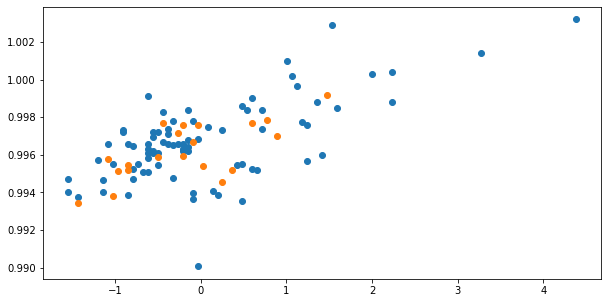

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:,0], Y_train)
plt.scatter(X_valid[:,0], Y_valid)

### Important functions

This is the linear function

In [16]:
def linear(X, theta):
    return X@theta

Implementation of square error loss

In [17]:
def linear_loss(X, theta, Y):
    n = X.shape[0]
    
    Y_hat = linear(X, theta)
    l = (Y_hat - Y).T @ (Y_hat - Y)
    l /= (2*n)
    
    return l[0][0]

gradient of the loss function

In [18]:
def linear_grad(X, theta, Y):
    n = X.shape[0]
    Y_hat = linear(X, theta)
    grad_theta = X.T@(Y_hat - Y)
    grad_theta /= n
    return grad_theta

### Stopping criteria

Here I have experimented with three stopping criteria

In [18]:
plt.rcParams["figure.figsize"] = (20,10)

In [19]:
def batch_gradient_descent_1(X_train, Y_train, lr=0.1, num_iter=100):
    
    theta = np.zeros((2, 1))

    theta_values, training_losses = [], []
    theta_values.append(theta.copy())
    training_losses.append(linear_loss(X_train, theta, Y_train))

    for t in range(num_iter):    
        theta -= lr * linear_grad(X_train, theta, Y_train)

        training_losses.append(linear_loss(X_train, theta, Y_train))
        theta_values.append(theta.copy())
        
    return training_losses, theta_values

In [20]:
def batch_gradient_descent_2(X_train, Y_train, lr=0.1, eps=1e-6):
    theta = np.zeros((2, 1))

    theta_values, training_losses = [], []
    theta_values.append(theta.copy())
    training_losses.append(linear_loss(X_train, theta, Y_train))

    while True:    
        theta -= lr * linear_grad(X_train, theta, Y_train)

        training_losses.append(linear_loss(X_train, theta, Y_train))
        theta_values.append(theta.copy())
        
        if (np.abs( theta_values[-1] - theta_values[-2]) < eps).all():
            break
        
    return training_losses, theta_values

In [21]:
def batch_gradient_descent_3(X_train, Y_train, lr=0.1, eps=1e-6):
    theta = np.zeros((2, 1))

    theta_values, training_losses = [],[]
    theta_values.append(theta.copy())
    training_losses.append(linear_loss(X_train, theta, Y_train))

    while True:
        dtheta = linear_grad(X_train, theta, Y_train)
        theta -= lr * dtheta

        training_losses.append(linear_loss(X_train, theta, Y_train))
        theta_values.append(theta.copy())
        
        if (np.abs(dtheta) < eps).all():
            break
        
    return training_losses, theta_values

1. __number of iterations__

function `batch_gradient_descent_1` implements this function present in `1a.py`

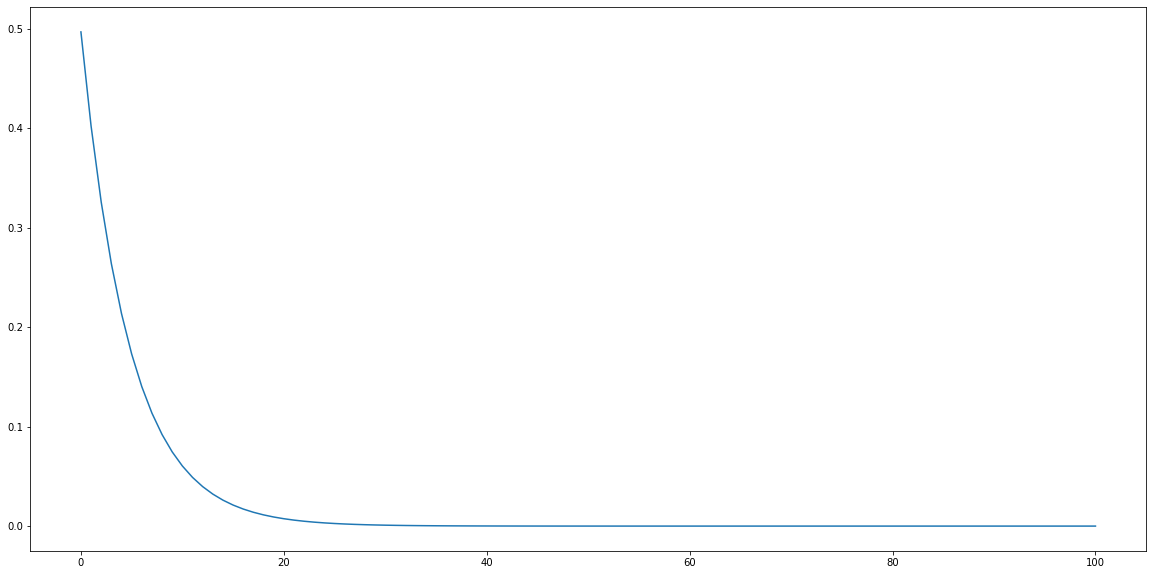

In [22]:
training_losses, theta_values = batch_gradient_descent_1(X_train, Y_train, 
                                                         lr=0.1, num_iter=100)
plt.plot(training_losses)

2. __$| \frac{\partial J(\theta)}{\partial x} | < \varepsilon$, where $J(\theta)$ is the cost function.__

function `batch_gradient_descent_2` implements this function present in `1a.py`

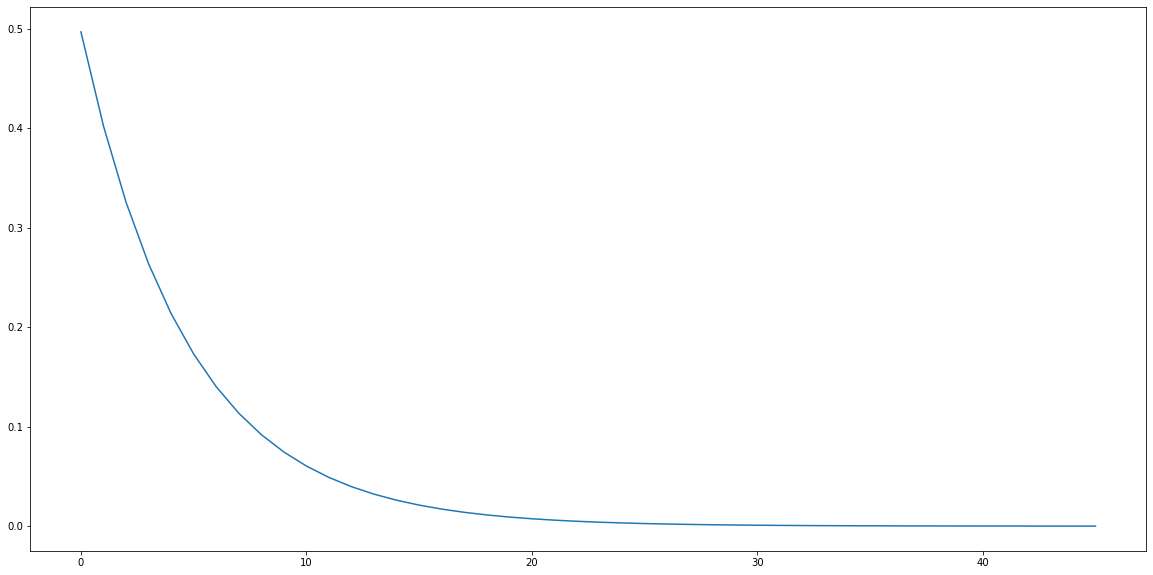

In [23]:
training_losses, theta_values = batch_gradient_descent_2(X_train, Y_train, lr=0.1, eps=1e-3)
plt.plot(training_losses)

3. $| \theta_{t+1} - \theta_{t} | < \varepsilon$

function `batch_gradient_descent_3` implements this function present in `1a.py`

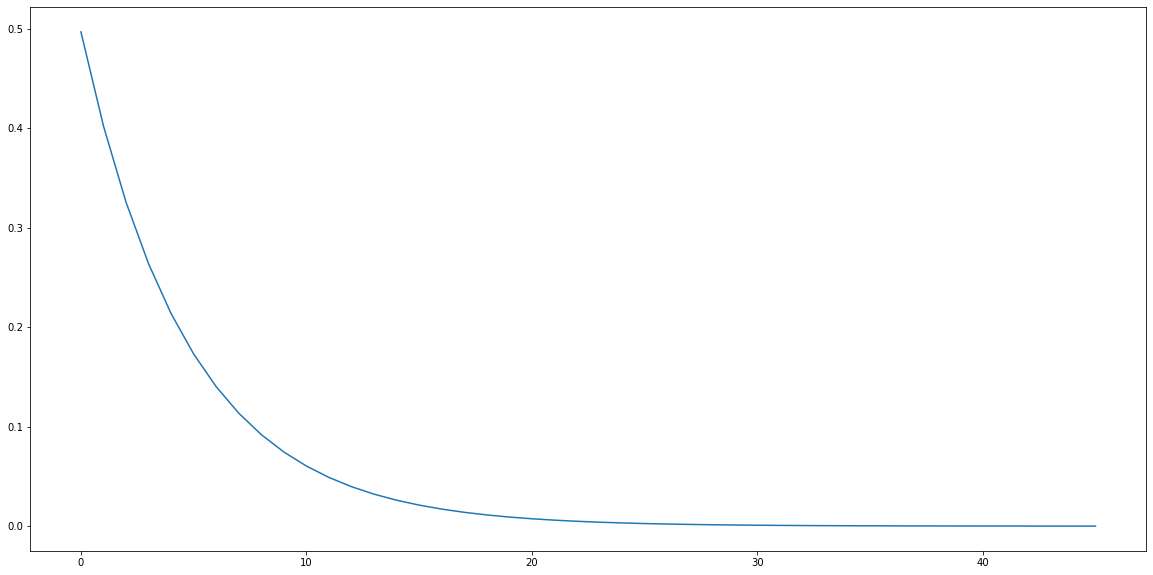

In [24]:
training_losses, theta_values = batch_gradient_descent_3(X_train, Y_train, lr=0.1, eps=1e-2)
plt.plot(training_losses)

Above it can be seen that the loss graphs for the criteria 2 and 3 are the same confirming
$$|\theta_{t+1} - \theta_{t}| = |\eta \frac{\partial J(\theta)}{\partial x}|$$

__The stopping criteria I have choosen is a combination of number of iterations and the absolute value of the gradient.__

In [ ]:
if (np.abs(dtheta) < eps).all() or max_iter < num_iter:
    break

__Implemenation of the batch gradient descent__

In [25]:
def batch_gradient_descent(X_train, Y_train, X_valid, Y_valid, lr=0.1, 
                           eps=1e-2, max_iter=100):
    
    #initializing theta to zero
    theta = np.zeros((2, 1))

    thetas, train_loss, valid_loss = [], [], []
    thetas.append(theta.copy())
    train_loss.append(linear_loss(X_train, theta, Y_train))
    valid_loss.append(linear_loss(X_valid, theta, Y_valid))
    
    num_iter = 0
    while True:
        #descent step
        dtheta = linear_grad(X_train, theta, Y_train)
        theta -= lr * dtheta

        train_loss.append(linear_loss(X_train, theta, Y_train))
        valid_loss.append(linear_loss(X_valid, theta, Y_valid))
        thetas.append(theta.copy())
        num_iter += 1
        
        #stopping condition
        if (np.abs(dtheta) < eps).all() or max_iter < num_iter:
            break
                
    return thetas, train_loss, valid_loss

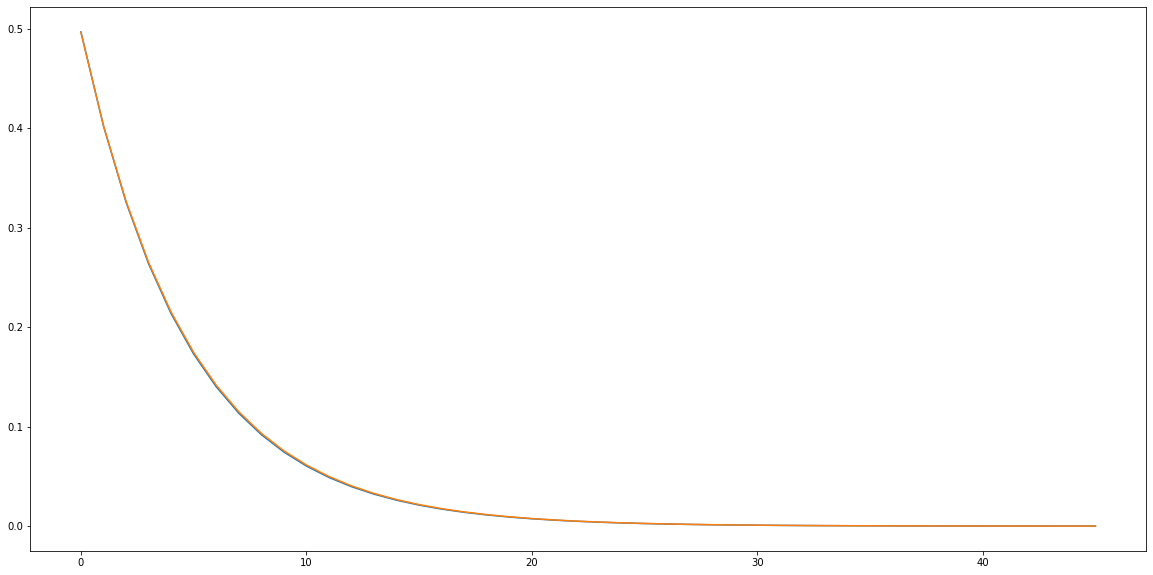

In [26]:
thetas, train_loss, valid_loss = batch_gradient_descent(X_train, Y_train, X_valid, Y_valid, 
                                                        lr=0.1, eps=1e-2)
plt.plot(train_loss)
plt.plot(valid_loss)

Both training and validation losses are superimposing each other

### Selecting the learning rate

In [29]:
lrs = 10**np.linspace(-2, 0, 5)
train_losses, valid_losses = [], []
for lr in lrs:
    thetas, train_loss, valid_loss = batch_gradient_descent(X_train, Y_train, X_valid, Y_valid, 
                                                        lr=lr, eps=1e-2)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

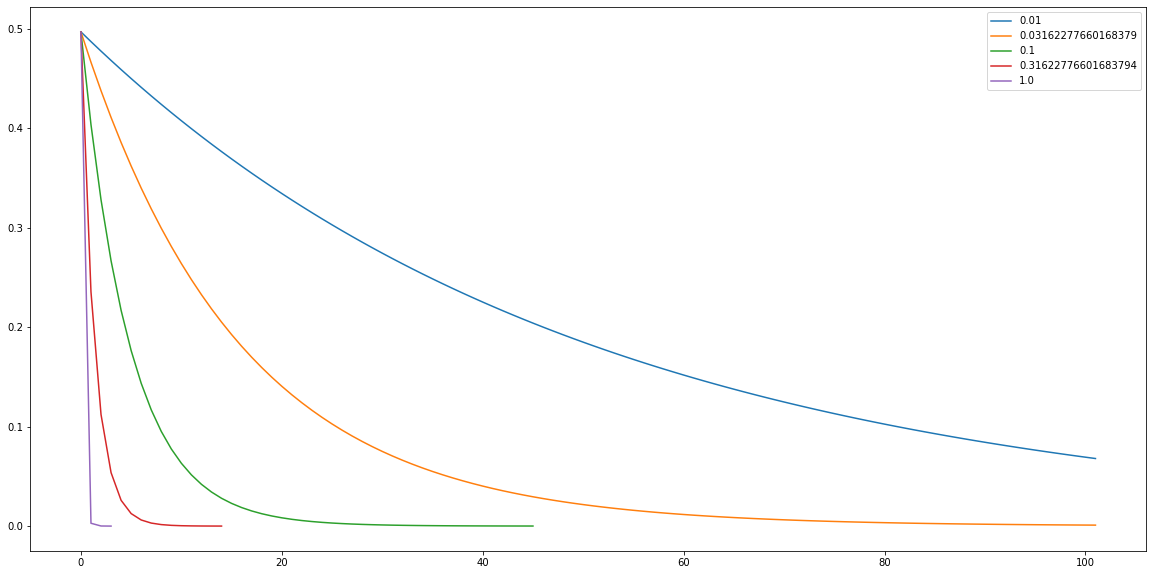

In [149]:
plt.figure(figsize=(20, 10))
for i in range(len(lrs)):
    plt.plot(valid_losses[i])
    
plt.legend(lrs)

So from the above graph we can see that 0.316 is a good learing rate. The best one is 1, but proper visualization of the training process have choose 0.316

### Training entire data

In [30]:
X_data = np.vstack([X_train, X_valid])
Y_data = np.vstack([Y_train, Y_valid])

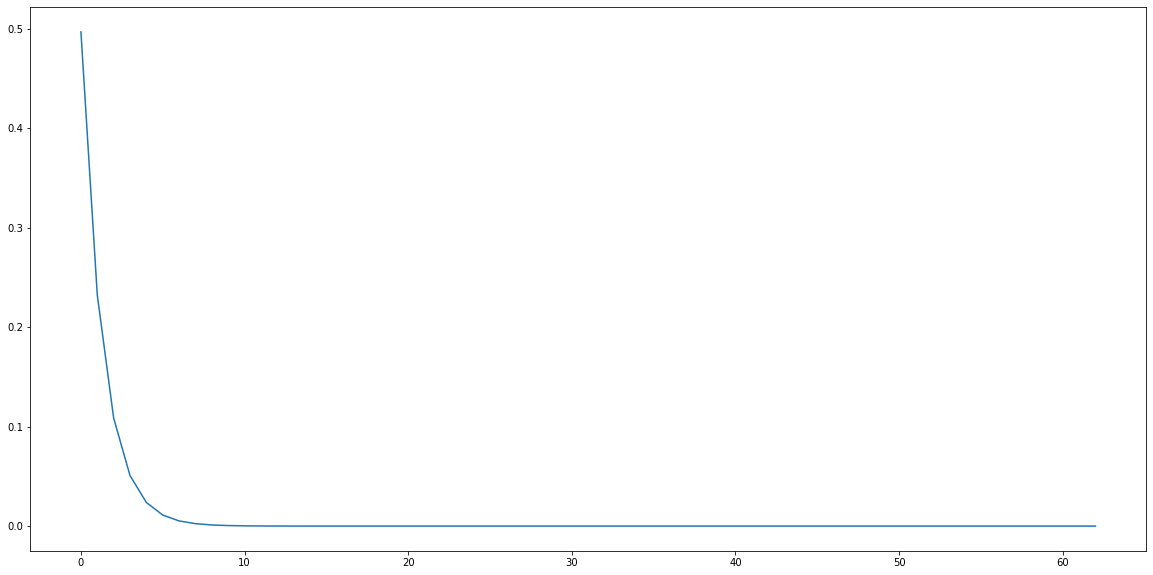

In [31]:
thetas, train_loss, valid_loss = batch_gradient_descent(X_data, Y_data, X_valid, Y_valid, 
                                                        lr=lrs[-2], eps=1e-10)
plt.plot(train_loss)

### Conclusion

* __Learning rate__ : 0.316
* __Final parameters__ : $\theta_1 = 0.0013402$, $\theta_0 = 0.9966201$
* __Stopping criteria__: number of iteration and $| \frac{\partial J(\theta)}{\partial x} | < \varepsilon$ where $\varepsilon=10^{-10}$

## b. Plotting graphs

In [32]:
theta = thetas[-1]

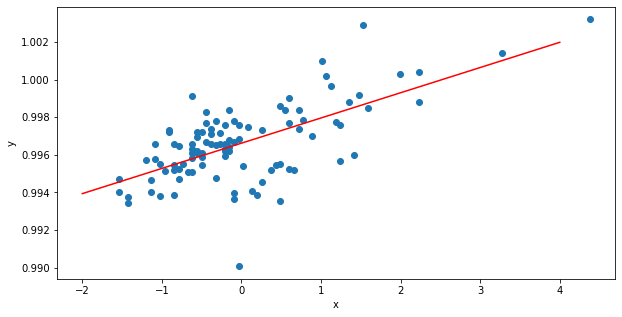

In [33]:
n = 100
X = np.linspace(-2, 4, n)
X = np.hstack([X.reshape(-1, 1), np.ones((n, 1))])

plt.figure(figsize=(10, 5))
plt.scatter(X_data[:,0], Y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X[:, 0],linear(X, theta).reshape(-1), color="r")

In [20]:
def grad_ani(i, line, X, theta_values):
    i = i%len(theta_values)
    line.set_data(X[:, 0],linear(X, theta_values[i]).reshape(-1))
    return line

In [21]:
def get_animation(X_data, Y_data, theta_values):
    n = 100
    X = np.linspace(-2, 4, n)
    X = np.hstack([X.reshape(-1, 1), np.ones((n, 1))])

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(X_data[:,0], Y_data)
    ax.set_xlim((-2,4))
    ax.set_ylim((0.99,1.002))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Gradient Descent')
    line, = ax.plot(X[:, 0],linear(X, theta_values[0]).reshape(-1), color="r")

    animator = ani.FuncAnimation(fig, grad_ani, frames=100, interval=100, 
                                 fargs=(line, X, theta_values))
    plt.close()
    return animator

In [23]:
animator = get_animation(X_data, Y_data, thetas); animator

## c. 3D surface

The error function in 3D dimension looks like a bowl

In [34]:
from mpl_toolkits import mplot3d

In [35]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        th = np.array([X[r][c], Y[r][c]]).reshape(-1, 1)
        Z[r][c] = linear_loss(X_data, th, Y_data)

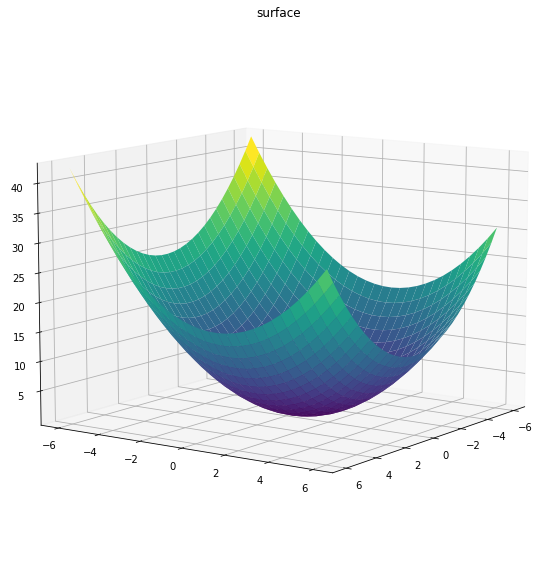

In [36]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

ax.set_title('surface');

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(10, 35)

__Tracking the change in the error function during training__

In [37]:
x = np.linspace(-1, 1, 30)
y = np.linspace(-0.1, 2.1, 30)

X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        th = np.array([X[r][c], Y[r][c]]).reshape(-1, 1)
        Z[r][c] = linear_loss(X_data, th, Y_data)

In [38]:
xdata = np.array(thetas)[:, 0, 0]
ydata = np.array(thetas)[:, 1, 0]
zdata = train_loss

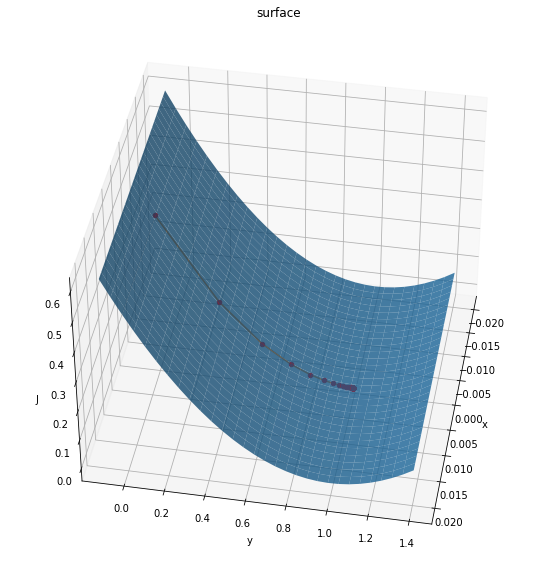

In [42]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

ax.set_title('surface');


ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot3D(xdata, ydata, zdata)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('J')
ax.scatter3D(xdata, ydata, zdata, c='r', s=20, depthshade=False)
ax.view_init(40, 10)

__Please run the code for animation__

In [40]:
def surf_ani(i, line, points, xdata, ydata, zdata):
    i = i%len(xdata)
    points._offsets3d = (xdata[:i],ydata[:i], zdata[:i])
    line.set_data_3d(xdata[:i], ydata[:i], zdata[:i])
    return line, points

x = np.linspace(-0.02, 0.02, 30)
y = np.linspace(-0.1, 1.4, 30)

X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        th = np.array([X[r][c], Y[r][c]]).reshape(-1, 1)
        Z[r][c] = linear_loss(X_data, th, Y_data)

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.set_title('surface');
ax.plot_surface(X, Y, Z, alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('J')
line, = ax.plot3D([], [], [])
points = ax.scatter3D(xdata, ydata, zdata, c='r', s=40, depthshade=False)
ax.view_init(40, 10)

animator = ani.FuncAnimation(fig, surf_ani, frames=100, interval=1000, 
                             fargs=(line, points, xdata, ydata, zdata))

plt.close()

In [41]:
animator

## d. Contour

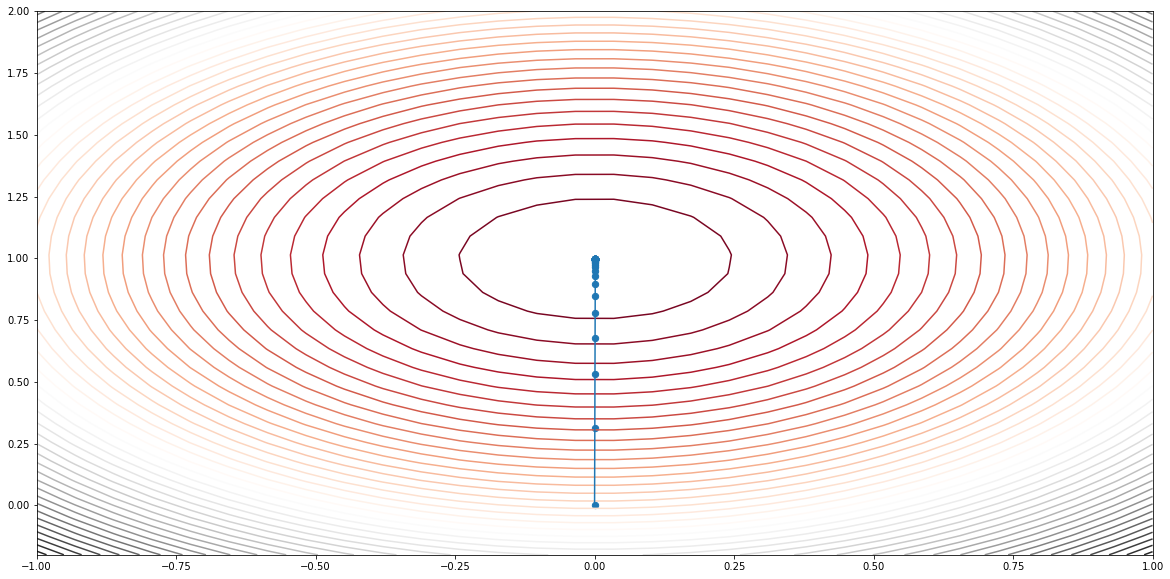

In [43]:
x = np.linspace(-1, 1, 30)
y = np.linspace(-0.2, 2, 30)

X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        th = np.array([X[r][c], Y[r][c]]).reshape(-1, 1)
        Z[r][c] = linear_loss(X_data, th, Y_data)

plt.figure(figsize=(20, 10))
plt.scatter(xdata, ydata, s=40)
plt.plot(xdata, ydata)
plt.contour(X, Y, Z, 40, cmap='RdGy')

__Please run the code for animation__

In [84]:
def grad_ani_contour(i, points, line, xdata, ydata):
    i = i%len(xdata)
    if i == 0:
        i = 1
    points.set_offsets(list(zip(xdata[:i],ydata[:i])))
    line.set_data(xdata[:i], ydata[:i])
    return points, line

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))
points = ax.scatter([], [])
line, = ax.plot([], [])
ax.contour(X, Y, Z, 40, cmap='RdGy')
animator = ani.FuncAnimation(fig, grad_ani_contour, frames=100, interval=100, 
                             fargs=(points, line, xdata, ydata))
plt.close()

In [88]:
animator

## e. Contours for different learning rate

In [109]:
lrs = [0.001, 0.025, 0.1]
train_losses, valid_losses, theta_values = [], [], []
for lr in lrs:
    thetas, train_loss, valid_loss = batch_gradient_descent(X_train, Y_train, X_valid, Y_valid, 
                                                        lr=lr, eps=1e-2, max_iter=10000)
    theta_values.append(thetas)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

In [110]:
def plot_contour(X_data, Y_data, train_loss, thetas):
    x = np.linspace(-1, 1, 30)
    y = np.linspace(-0.2, 2, 30)

    X, Y = np.meshgrid(x, y)

    Z = np.zeros(X.shape)
    for r in range(X.shape[0]):
        for c in range(X.shape[1]):
            th = np.array([X[r][c], Y[r][c]]).reshape(-1, 1)
            Z[r][c] = linear_loss(X_data, th, Y_data)

    xdata = np.array(thetas)[:, 0, 0]
    ydata = np.array(thetas)[:, 1, 0]
    zdata = train_loss

    plt.figure(figsize=(20, 10))
    plt.scatter(xdata, ydata, s=10)
    plt.contour(X, Y, Z, 40, cmap='RdGy')
    plt.show()

### learning rate : 0.001

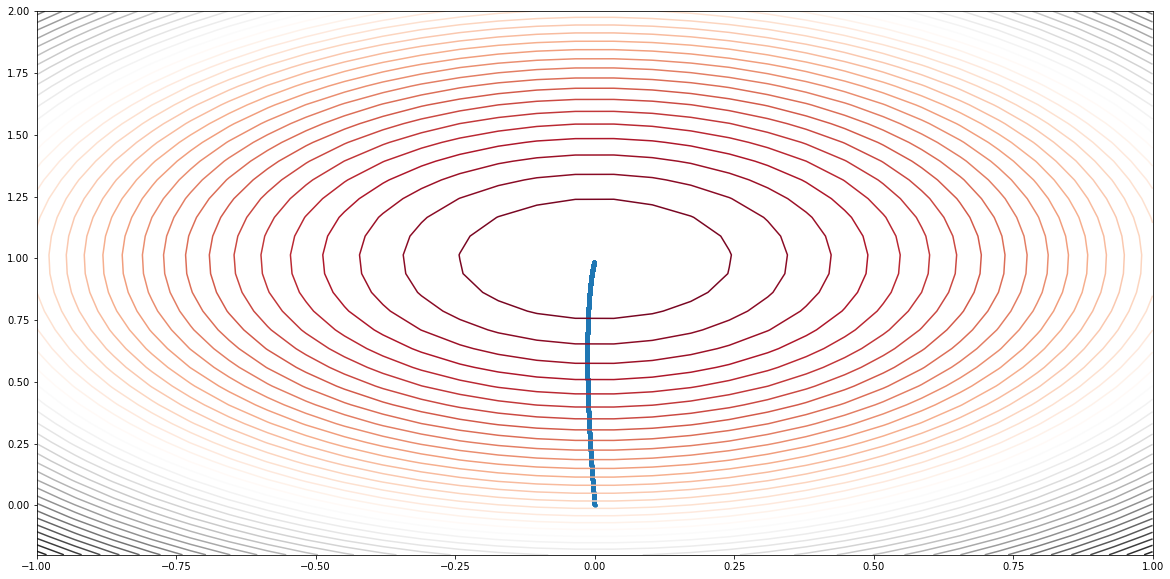

In [111]:
plot_contour(X_data, Y_data, train_losses[0], theta_values[0])

### learning rate : 0.025

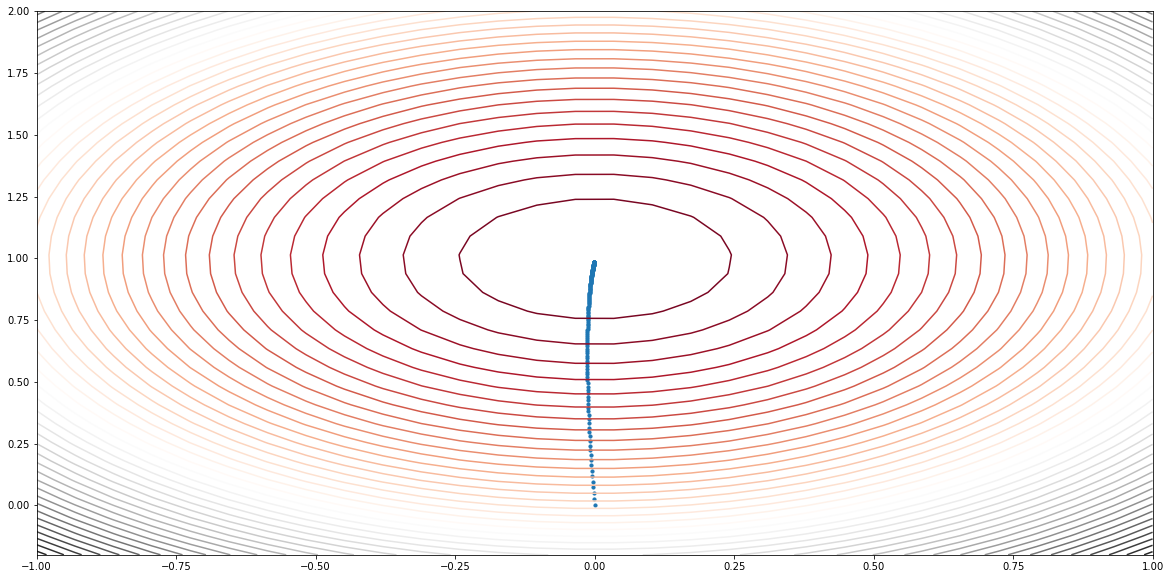

In [112]:
plot_contour(X_data, Y_data, train_losses[1], theta_values[1])

### learning rate : 0.1

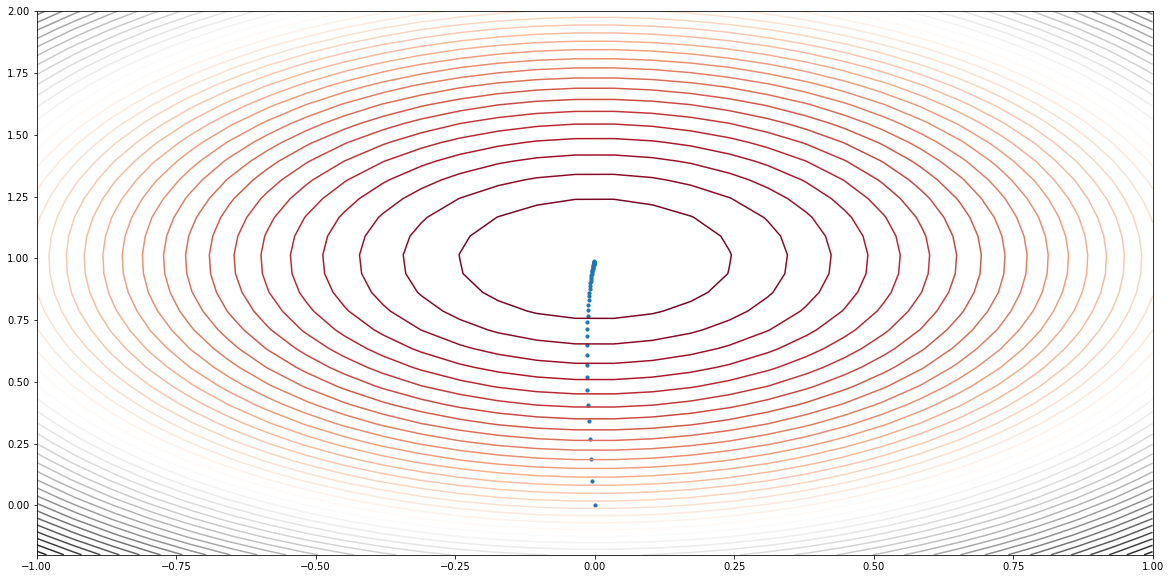

In [113]:
plot_contour(X_data, Y_data, train_losses[2], theta_values[2])

### Conclusion

We can see that the density of points drawn is in decreasing order from 0.001 to 0.1. So if the step size very small is takes a large number of iterations to reach the optimal value.

# Sampling and Stochastic Gradient Descent

__Instructions for running code__

In the folder Q2/, run the following script:
    
    bash run.sh ../../data/q2/q2test.csv
    
This will run all the sections of question 2

## a. Sampling

Code for sampling the data:

$x_1 \sim \mathcal{N}(3, 4)$

$x_2 \sim \mathcal{N}(-1, 4)$

$\epsilon \sim \mathcal{N}(0, 2)$

In [301]:
np.random.seed(10)
n = 10**6
x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)
e = np.random.randn(n, 1)

In [302]:
x1 = 2*x1 + 3
x2 = 2*x2 - 1
e = np.sqrt(2)*e

In [303]:
X_train = np.hstack([x2, x1, np.ones((n, 1))])

theta = np.array([2, 1, 3]).reshape(-1, 1)

Y_train = linear(X_train, theta) + e

#### Visualize surface

In [304]:
X = X_train[:, 0]
Y = X_train[:, 1]
Z = Y_train[:, 0]

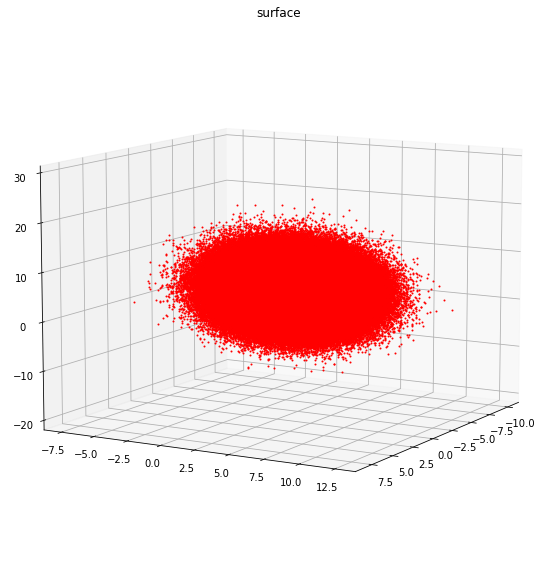

In [510]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_title('surface');
ax.scatter3D(X, Y, Z, c='r', depthshade=False, s=1)
ax.view_init(10, 30)

## b. Stochatic gradient descent

Below is the code for SGD:

In [645]:
def sgd(X_train, Y_train, bs=100, lr=0.1, k=50, eps=1e-6,  max_iter=1000):
    theta = np.zeros((3, 1))

    thetas, train_loss = [], []

    thetas.append(theta.copy())
    train_loss.append(linear_loss(X_train[:bs, :], theta, Y_train[:bs, :]))
    
    num_iter = 0
    avg_dtheta = 0
    
    iter_per_epoch = math.ceil(X_train.shape[0]/bs)
    
    while True:
        #creating a mini-batch
        bn = num_iter%iter_per_epoch
        b_start = int(bn*bs)
        X_batch, Y_batch = X_train[b_start:b_start+bs, :], Y_train[b_start:b_start+bs, :]
        
        #descent step
        dtheta = linear_grad(X_batch, theta, Y_batch)
        avg_dtheta += dtheta
        theta -= lr * dtheta
        
        num_iter += 1
        
        train_loss.append(linear_loss(X_batch, theta, Y_batch))
        thetas.append(theta.copy())
        
        #stopping condition
        if num_iter%k == 0:
            avg_dtheta /= k
            if (np.abs(avg_dtheta) < eps).all() or num_iter > max_iter:    
                break
            avg_dtheta = 0
        
    return train_loss, thetas

__Stopping criteria__: number of iteration and $| \frac{\partial J(\theta)}{\partial x} | < \varepsilon$

This is computed as an average over $k$ number of batches

In [ ]:
if num_iter%k == 0:
    avg_dtheta /= k
    if (np.abs(avg_dtheta) < eps).all() or num_iter > max_iter:    
        break
    avg_dtheta = 0

In [307]:
bss = [1, 10**2, 10**4, 10**6]
ks = [10**3, 10**2, 10, 1]
theta_values, train_losses, timings = [], [], []

for i,(bs,k) in enumerate(zip(bss, ks)):
    print(f"Training with batch size : {bs} :: {k}")
    start_time = time.time()
    train_loss, thetas = sgd(X_train, Y_train, bs=bs, lr=1e-3, k=k, 
                             eps=1e-5, max_iter=10**6)
    
    theta_values.append(thetas)
    train_losses.append(train_loss)
    
    end_time = time.time()
    timings.append(end_time-start_time)

Training with batch size : 1 :: 1000
Training with batch size : 100 :: 100
Training with batch size : 10000 :: 10
Training with batch size : 1000000 :: 1


In [308]:
sampled_losses = []
for i, k in enumerate(ks):
    train_loss = train_losses[i]
    sampled_loss = []
    for p in range(0, len(train_loss), k):
        sampled_loss.append(train_loss[p])
    sampled_losses.append(sampled_loss)

### Loss functions

#### batch size 1

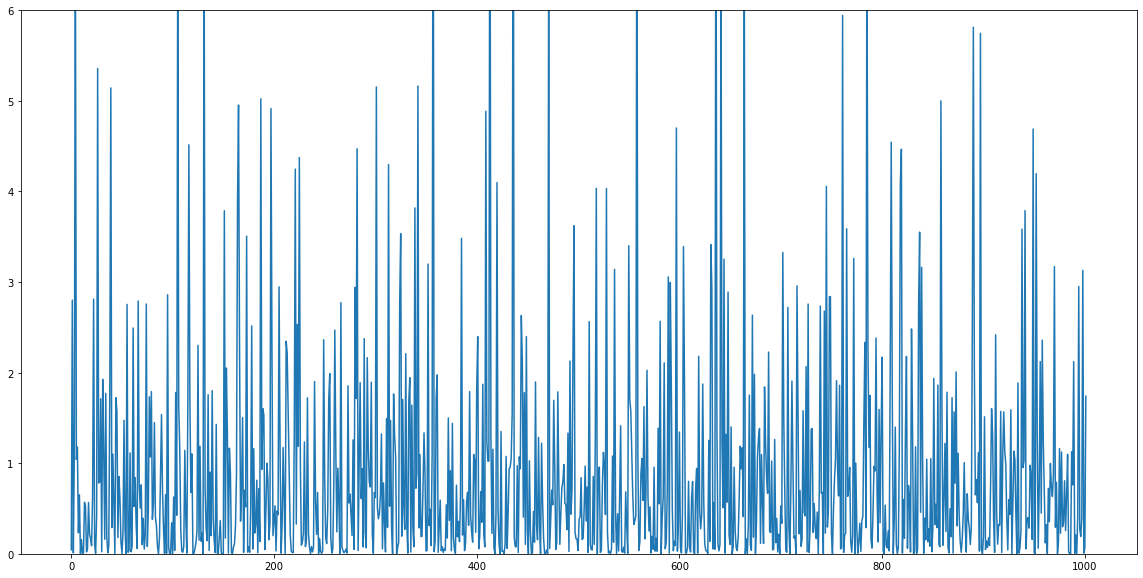

In [317]:
plt.figure(figsize=(20, 10))
plt.ylim(0, 6)
plt.plot(sampled_losses[0])

#### batch size 100

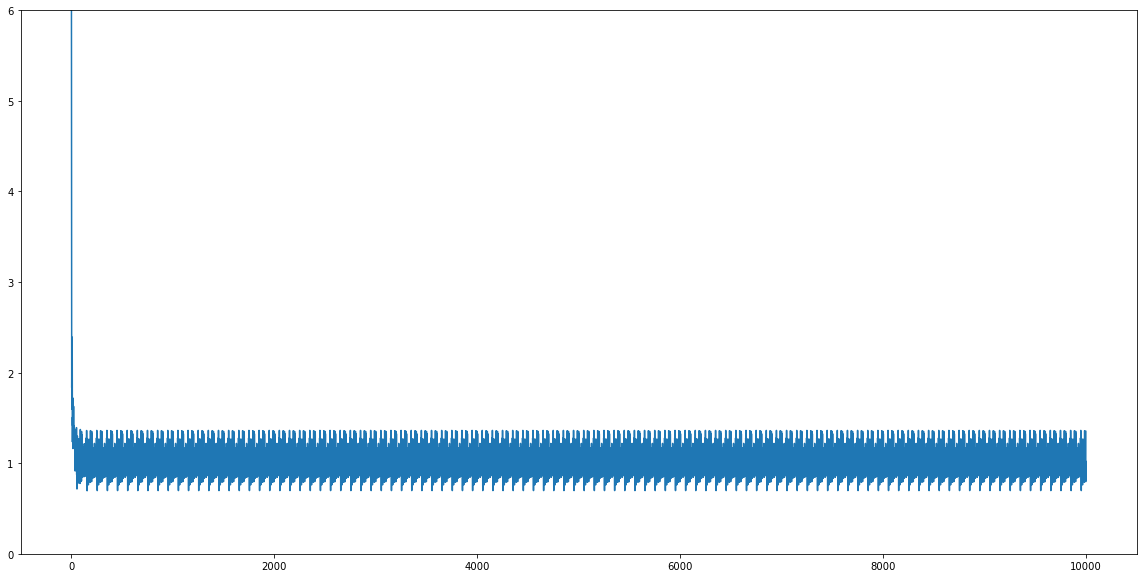

In [318]:
plt.figure(figsize=(20, 10))
plt.ylim(0, 6)
plt.plot(sampled_losses[1])

#### batch size 10000

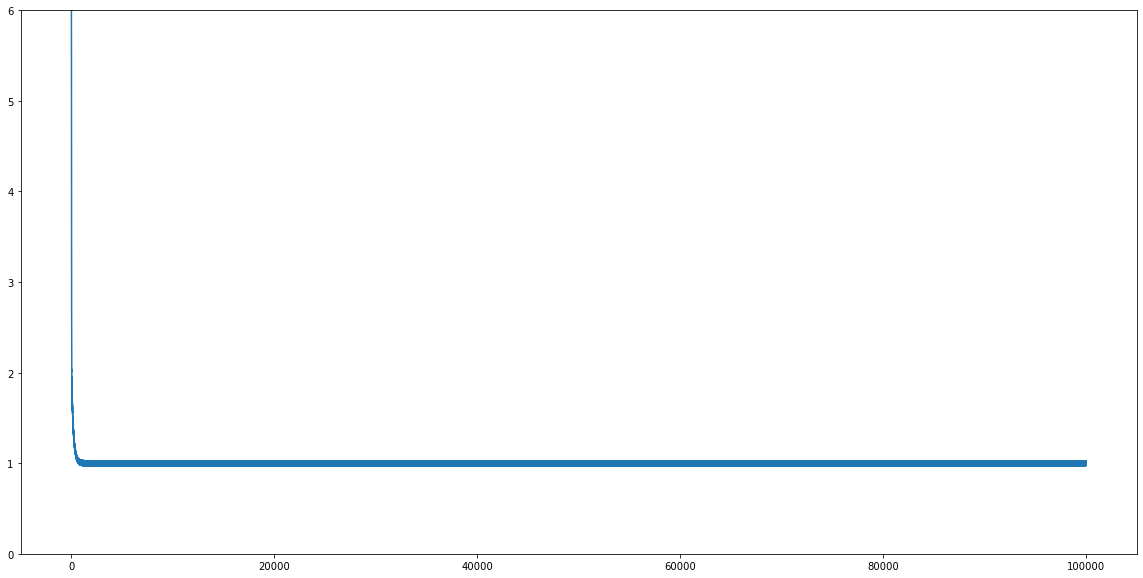

In [319]:
plt.figure(figsize=(20, 10))
plt.ylim(0, 6)
plt.plot(sampled_losses[2])

#### batch size 1000000

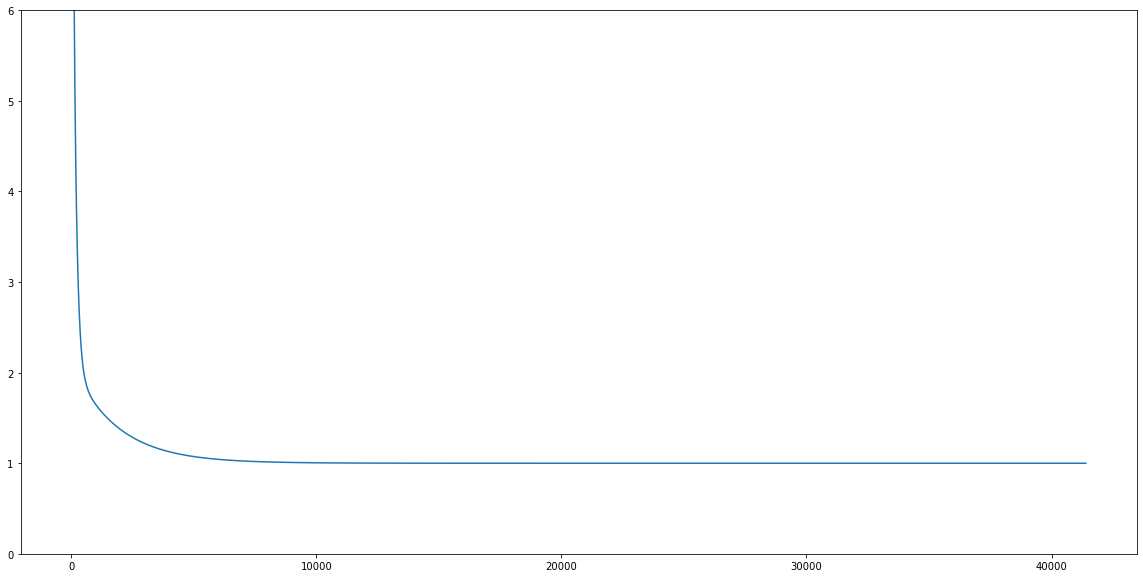

In [320]:
plt.figure(figsize=(20, 10))
plt.ylim(0, 6)
plt.plot(sampled_losses[3])

Here we can observe that as we increase the batch size the change in the loss function is smooth

In [321]:
for i, tr in enumerate(train_losses):
    print(f"training loss {i+1} : {tr[-1]}")

training loss 1 : 1.7400740141546958
training loss 2 : 1.3511641701552628
training loss 3 : 1.002563064934255
training loss 4 : 0.9995566015555766


### $\theta \ $ learned

In [322]:
for i,thetas in enumerate(theta_values):
    theta = thetas[-1]
    print(f"Theta {i+1} : {theta[0][0]} {theta[1][0]} {theta[2][0]}")

Theta 1 : 2.0268803584334947 0.9603642951124375 2.974903614008454
Theta 2 : 1.9997590154393874 0.9967850847839981 3.0028010634438385
Theta 3 : 2.0006924504554484 0.9992361704346588 3.003610883799405
Theta 4 : 2.0006612020582857 0.9990746802744249 3.0035452758076504


## c. Testing

### Observations

Yes, the different algorithms do converge to the same parameters.

In [323]:
theta = np.array([2, 1, 3]).reshape(-1, 1)
ths, errs, iters = [], [], []
for i,thetas in enumerate(theta_values):
    ths.append(thetas[-1])
    errs.append(np.linalg.norm(ths[-1] - theta))
    iters.append(len(train_losses[i]))
ths = np.array(ths)

In [324]:
pd.DataFrame(np.array([ths[:,0,:][:,0], ths[:,1,:][:,0], ths[:,2,:][:,0], errs, iters, timings]).T,
            columns=["theta_2", "theta_1", "theta_0", "l2 error", "iterations", "timing"])

,theta_2,theta_1,theta_0,l2 error,iterations,timing
0,2.026880,0.960364,2.974904,0.054068,1001001.0,13.360919
1,1.999759,0.996785,3.002801,0.004271,1000101.0,15.486632
2,2.000692,0.999236,3.003611,0.003755,1000011.0,119.535925
3,2.000661,0.999075,3.003545,0.003723,41400.0,207.054515


From the above table it can be seen that the speed for convergence in term of time is faster of smaller batch sizes.

And the number of iterations required is less for bigger batch size but the computation per iteration is large.

### Testing

In [348]:
# set appropriate data path
data_path = "/Users/suchith720/Desktop/ml_parag/assignment/A1/data/"
os.listdir(f"{data_path}/q2")

['q2test.csv']

In [336]:
# reading data
df = pd.read_csv(f"{data_path}/q2/q2test.csv")

X_test = df[['X_2', 'X_1']].to_numpy()
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

Y_test = df['Y'].to_numpy().reshape(-1, 1)

In [345]:
def l2_error(Y_pred, Y):
    d = (Y_pred - Y)
    l2 = d.T@d
    l2 = l2/Y.shape[0]
    return l2[0][0]

In [366]:
#computing error
error = []
for th in np.vstack([ths, [theta]]):
    Y_pred = linear(X_test, th)
    l2 = l2_error(Y_pred, Y_test)
    error.append(l2)

In [369]:
pd.DataFrame(np.array(error).reshape(1, -1), index=["l2_error"], 
             columns=[0, 1, 2, 3, "original"])

,0,1,2,3,original
l2_error,2.204881,1.967365,1.965865,1.965917,1.965894


As we can see all the errors are very close to the error of the original hypothesis, the error with batch size 1 is a bit away from the original.

## d. 3d surface

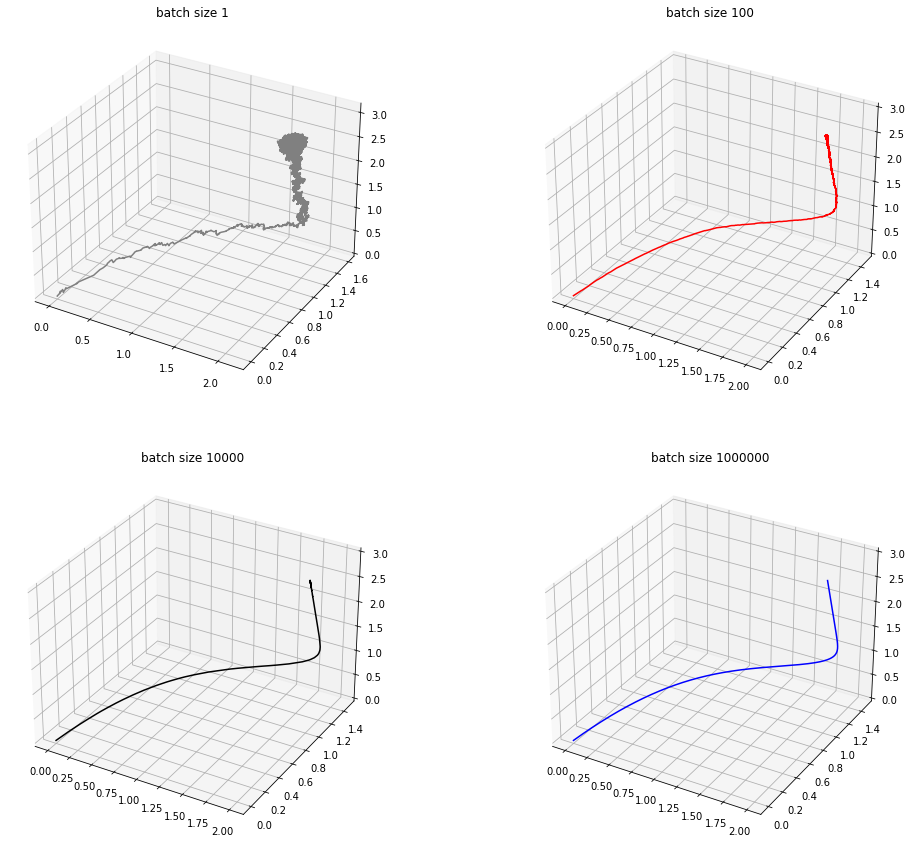

In [374]:
fig = plt.figure(figsize=(17,15))
colors = ['gray', 'red', 'black', 'blue']
for i in range(4):
    plt_id = int(f"22{i+1}")
    ax = fig.add_subplot(plt_id, projection='3d')
    theta = np.array(theta_values[i])
    ax.set_title(f"batch size {bss[i]}")
    ax.plot3D(theta[:,0,0], theta[:,1,0], theta[:,2,0], colors[i])

Yes, this makes sense intuitively. As the batch size is smaller the deviation from the original gradient direction should be more. And also when we perform stochastic gradient descent on convex function the parameters are guaranteed to converge within some distance from the minima where this distance is smaller for larger batch size, this can be seen in the above plots.

The batch size 1 converges within a larger region around the minima as compared to others and also each step is more random/ less smooth as compared to others.

# Logistic regression

__Instructions for running code__

In the folder Q3/, run the following script:
    
    bash run.sh ../../data/q3/logisticX.csv ../../data/q3/logisticY.csv
    
This will run all the sections of question 3

* Reading data and labels
* Normalizing the data
* Inserting intercept

In [5]:
#reading the input data
X_train = pd.read_csv(f"{data_path}/q3/logisticX.csv", header=None).to_numpy()
Y_train = pd.read_csv(f"{data_path}/q3/logisticY.csv", header=None).to_numpy()

#normalizing the data
X_train = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
X_train = np.hstack([X_train, np.ones( (X_train.shape[0], 1) )])

## a. Implementing Newton's method for descent

__Visualizing the data__

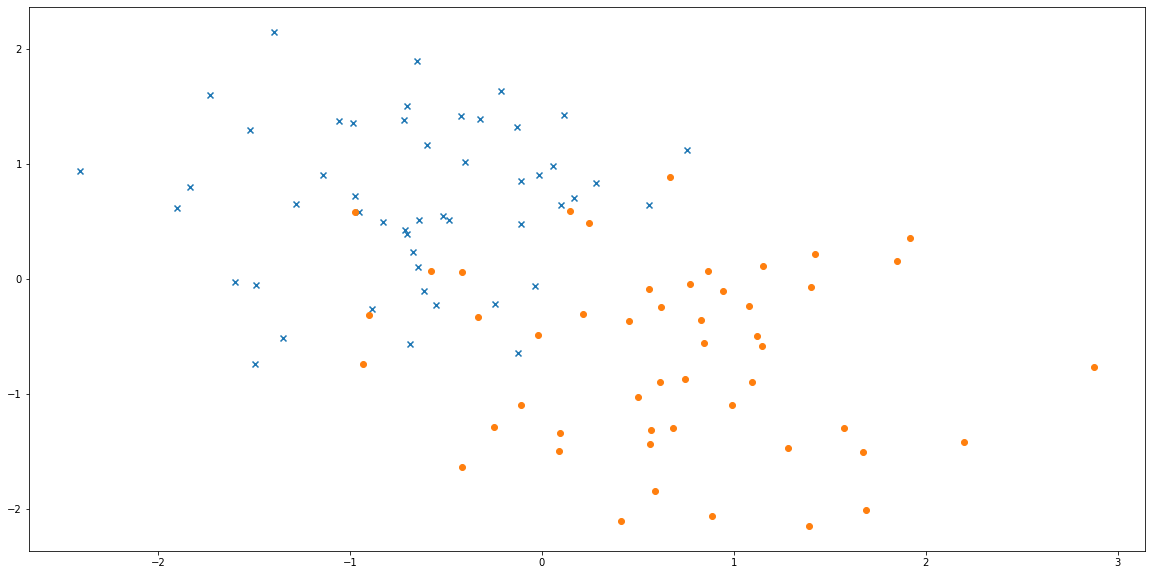

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train[:,0:1][Y_train==0], X_train[:,1:2][Y_train==0], marker='x')
plt.scatter(X_train[:,0:1][Y_train==1], X_train[:,1:2][Y_train==1])

### Important functions

In [7]:
def sigmoid(z):
    y = np.exp(-z) + 1
    return 1/y

In [8]:
def logistic(X, theta):
    z = linear(X, theta)
    return sigmoid(z)

In [9]:
def logistic_grad(X, theta, Y):
    Y_hat = logistic(X, theta)
    grad_theta = X.T@(Y - Y_hat)
    return grad_theta

In [10]:
def logistic_loglikelihood(X, theta, Y):
    Y_hat = logistic(X, theta)
    return np.sum(np.log(np.where(Y, Y_hat, 1 - Y_hat)) )

### Hessian computation

In [11]:
def logistic_hessian(X, theta, Y):
    Y_hat = logistic(X, theta)
    c = -1 * Y_hat * (1 - Y_hat)
    X_tfm = Y_hat * X
    return -X.T @ X_tfm

### Newton descent

In [26]:
def newton_descent(X_train, Y_train, eps=1e-6, max_iter=100):
    theta = np.zeros((3, 1))

    theta_values, loglikelihood = [], []
    theta_values.append(theta.copy())
    loglikelihood.append(logistic_loglikelihood(X_train, theta, Y_train))
    
    num_iter = 0
    lr = 0.1
    while True:
        #update step
        grad = logistic_grad(X_train, theta, Y_train)
        H = logistic_hessian(X_train, theta, Y_train)
        H_inv = np.linalg.inv(H)
        theta -= H_inv@grad
        
        theta_values.append(theta.copy())
        loglikelihood.append(logistic_loglikelihood(X_train, theta, Y_train))
        
        num_iter += 1
        if (np.abs(theta_values[-1] - theta_values[-2]) < eps).all() or num_iter > max_iter:
            return loglikelihood, theta_values

__stopping criteria__ : number of iteration and $| \theta_{t+1} - \theta_{t} | < \varepsilon$

In [14]:
if (np.abs(theta_values[-1] - theta_values[-2]) < eps).all() or num_iter > max_iter:
    return loglikelihood, theta_values

### Training

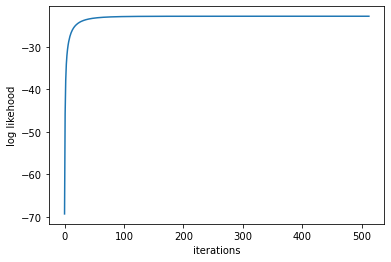

In [27]:
loglikehood, theta_values = newton_descent(X_train, Y_train, eps=1e-5, max_iter=1000)
plt.xlabel("iterations")
plt.ylabel("log likehood")
plt.plot(loglikehood)

In [28]:
theta_values[-1]

array([[ 2.58785819],
       [-2.72485167],
       [ 0.4009193 ]])

### Conclusion

__Final parameters__ : $\theta_2 = 2.58785$, $\theta_1 = -2.7248$, $\theta_0 = 0.40091$

## b. Decision boundary

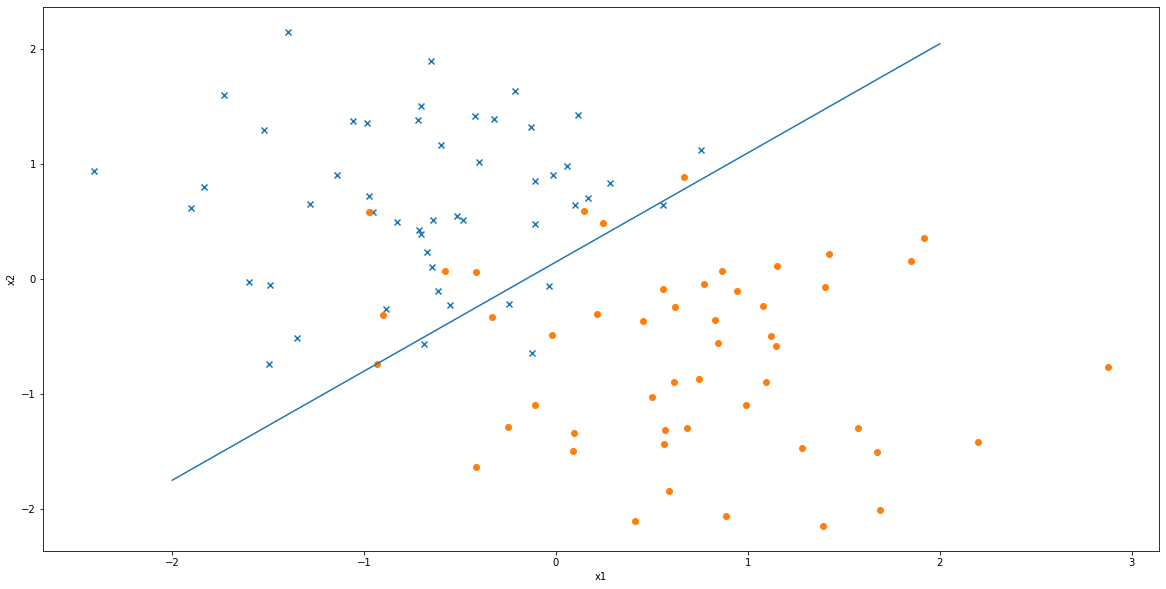

In [96]:
theta = theta_values[-1]

x = np.linspace(-2, 2, 30)
y = - (x*theta[0]+theta[2])/theta[1]

plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_train[:,0:1][Y_train==0], X_train[:,1:2][Y_train==0], marker='x')
plt.scatter(X_train[:,0:1][Y_train==1], X_train[:,1:2][Y_train==1])

# Gaussian Discrmimant Analysis 

In the folder Q4/, run the following script:
    
    bash run.sh ../../data/q4/q4x.dat ../../data/q4/q4y.dat
    
This will run all the sections of question 4

* Reading data and labels
* Normalizing the data

In [98]:
#reading data
X_train = pd.read_csv(f"{data_path}/q4/q4x.dat", header=None, sep="  ", engine="python").to_numpy()
Y_train = pd.read_csv(f"{data_path}/q4/q4y.dat", header=None, sep="  ", engine="python").to_numpy()
classes = np.unique(Y_train)

#normalizing data
X_train = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)

## a. GDA with same co-variance matrix

In [99]:
c1_pos = np.where(Y_train == classes[0])[0]
c2_pos = np.where(Y_train == classes[1])[0]

X_c1 = X_train[c1_pos]
X_c2 = X_train[c2_pos]

n = X_train.shape[0]

In [100]:
phi = c1_pos.shape[0]/n

mu_1 = np.mean(X_c1, axis=0).reshape(-1, 1)
mu_2 = np.mean(X_c2, axis=0).reshape(-1, 1)

X_c1_centered = X_c1 - mu_1.T
X_c2_centered = X_c2 - mu_2.T
S = (X_c1_centered.T@X_c1_centered + X_c2_centered.T@X_c2_centered)/n

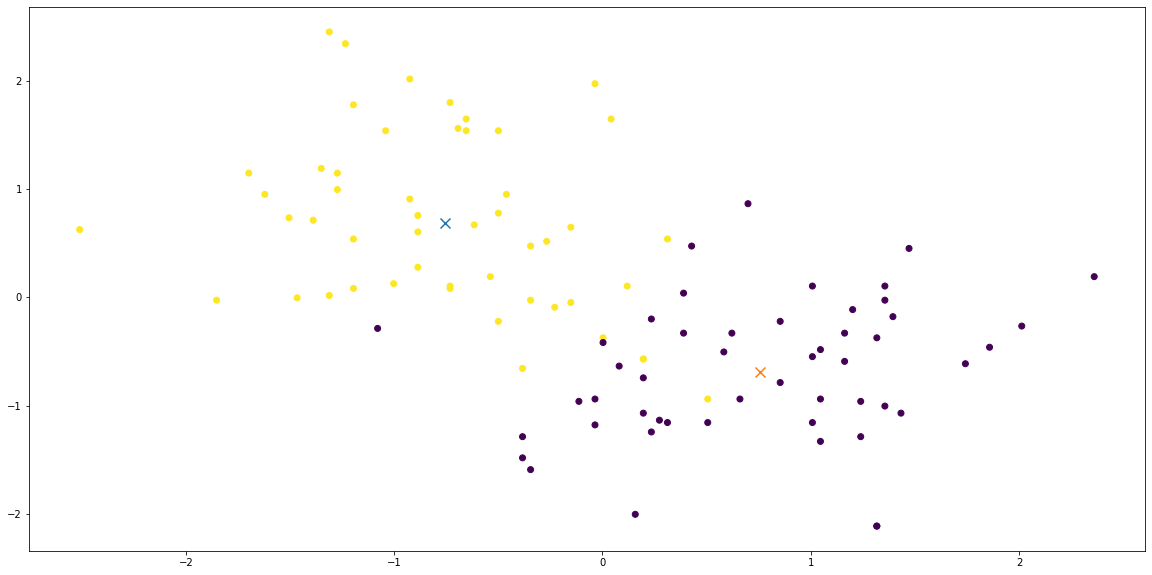

In [101]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train==classes[0])
plt.scatter(mu_1[0], mu_1[1], marker='x', s=100)
plt.scatter(mu_2[0], mu_2[1], marker='x', s=100)

### Conclusion

In [102]:
phi,  mu_1, mu_2, S

(0.5,
 array([[-0.75529433],
        [ 0.68509431]]),
 array([[ 0.75529433],
        [-0.68509431]]),
 array([[ 0.42953048, -0.02247228],
        [-0.02247228,  0.53064579]]))

$\phi = 0.5$

$\mu_0 = (-0.75529433, 0.68509431)$

$\mu_1 = (0.75529433, -0.68509431)$

$\Sigma = 
\begin{bmatrix}
0.42953048 & -0.02247228\\
-0.02247228 & 0.53064579
\end{bmatrix}$

## b. Visualizing the data

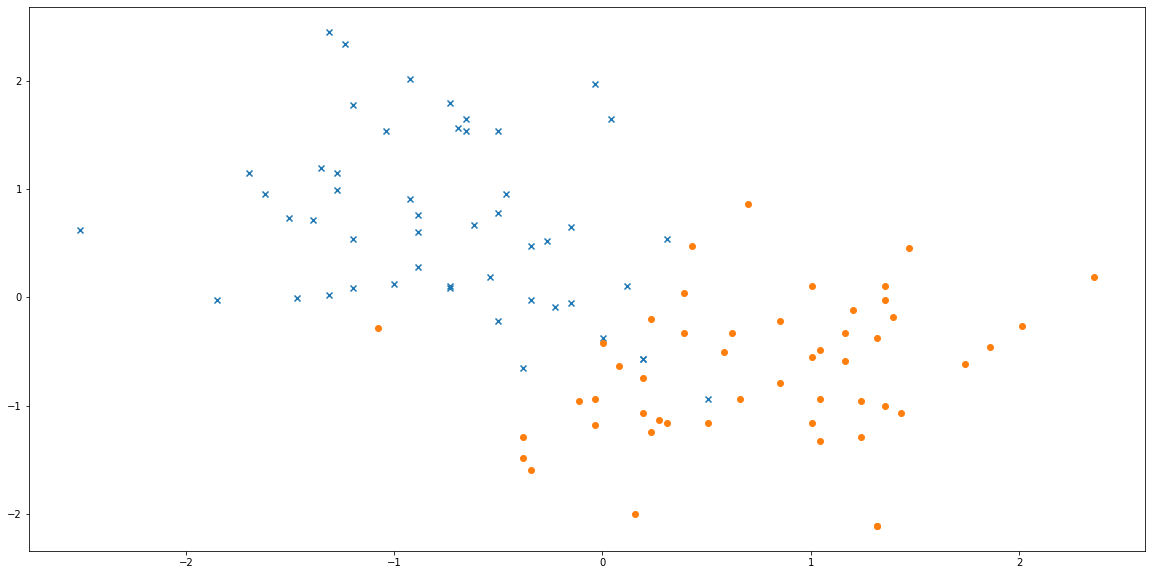

In [103]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train[:, 0:1][Y_train==classes[0]], X_train[:, 1:2][Y_train==classes[0]], marker='x')
plt.scatter(X_train[:, 0:1][Y_train==classes[1]], X_train[:, 1:2][Y_train==classes[1]])

## c. Decision boundary

__The equation of the decision boundary:__

$$2x^T\Sigma^{-1}(\mu_0 - \mu_1) + \mu_1^T\Sigma^{-1}\mu_1 - \mu_0^T\Sigma^{-1}\mu_0 +
     2 \log(\frac{1 - \phi}{\phi}) = 0$$

In [104]:
S_inv = np.linalg.inv(S); S_inv

array([[2.33329319, 0.09881246],
       [0.09881246, 1.88868084]])

In [105]:
c1 = mu_2.T@S_inv@mu_2 - mu_1.T@S_inv@mu_1 + 2*np.log((1-phi)/phi)
c2 = S_inv@(mu_1 - mu_2)

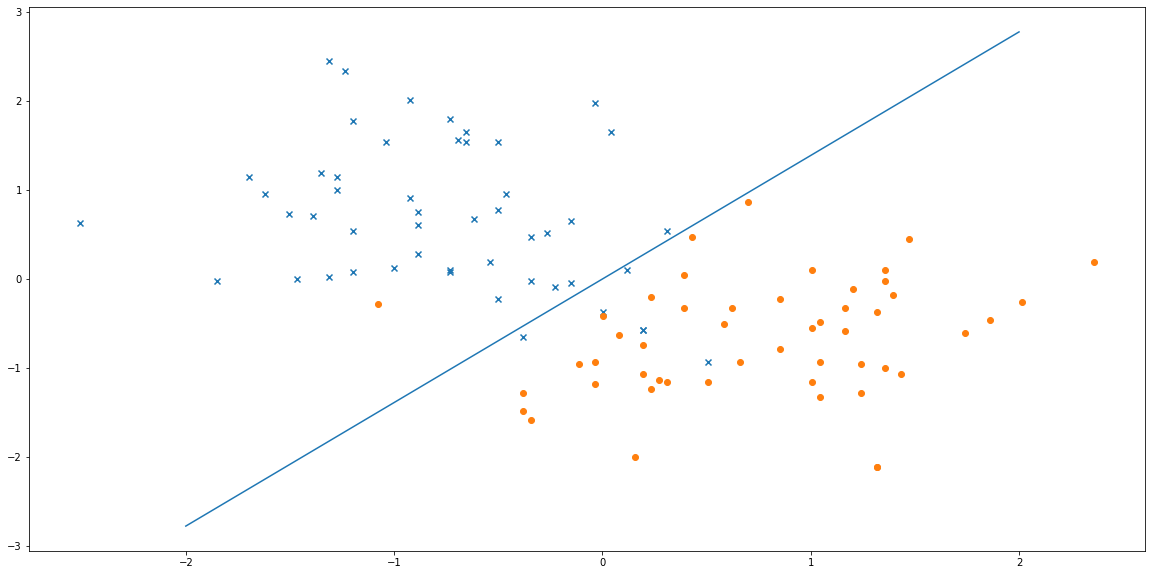

In [106]:
plt.figure(figsize=(20, 10))
x = np.linspace(-2, 2, 40)
y = - (x*c2[0][0]+c1[0][0])/c2[1][0]

plt.plot(x, y)
plt.scatter(X_train[:, 0:1][Y_train==classes[0]], X_train[:, 1:2][Y_train==classes[0]], marker='x')
plt.scatter(X_train[:, 0:1][Y_train==classes[1]], X_train[:, 1:2][Y_train==classes[1]])

## d. GDA with different co-variance matrix

In [107]:
S_1 = (X_c1_centered.T@X_c1_centered)/X_c1_centered.shape[0]
S_2 = (X_c2_centered.T@X_c2_centered)/X_c2_centered.shape[0]

In [108]:
S_1, S_2

(array([[ 0.38158978, -0.15486516],
        [-0.15486516,  0.64773717]]),
 array([[0.47747117, 0.1099206 ],
        [0.1099206 , 0.41355441]]))

$\phi = 0.5$

$\mu_0 = (-0.75529433, 0.68509431)$

$\mu_1 = (0.75529433, -0.68509431)$

$\Sigma_0 = 
\begin{bmatrix}
0.38158978 & -0.15486516\\
-0.15486516 &  0.64773717
\end{bmatrix}$

$\Sigma_1 = 
\begin{bmatrix}
0.47747117 & 0.1099206\\
0.1099206 & 0.41355441
\end{bmatrix}$

## e. Decision boundary

The equation of the decision boundary:
\begin{equation}
x^T(\Sigma_1^{-1} - \Sigma_0^{-1})x - 2x^T (\Sigma_1^{-1}\mu_1 - \Sigma_0^{-1}\mu_0) + \mu_1^T\Sigma^{-1}\mu_1 - \mu_0^T\Sigma^{-1}\mu_0 + 2 \log(\frac{1 - \phi}{\phi}) + \log(\frac{|\Sigma_1|}{|\Sigma_0|})= 0
\end{equation}

In [109]:
S_1_inv = np.linalg.inv(S_1)
S_2_inv = np.linalg.inv(S_2)

In [113]:
C1 = mu_2.T@S_2_inv@mu_2 - mu_1.T@S_1_inv@mu_1 + 2*np.log((1-phi)/phi) + np.log( np.linalg.det(S_2)/ np.linalg.det(S_1) )

In [114]:
C2 = S_2_inv@mu_2 - S_1_inv@mu_1
C2 = -2*C2

In [115]:
C3 = S_2_inv - S_1_inv

In [116]:
c1 = C3[0, 0]
c2 = C3[0, 1]
c3 = C3[1, 0]
c4 = C3[1, 1]
c5 = C2[0, 0]
c6 = C2[1, 0]
c7 = C1[0, 0]

In [117]:
a = c4
b = (c2+c3)*x + c6
c = c1*x**2 + c5*x + c7

In [118]:
y1 = (-b+np.sqrt(b**2 - 4*a*c))/2*a

In [119]:
y2 = (-b-np.sqrt(b**2 - 4*a*c))/2*a

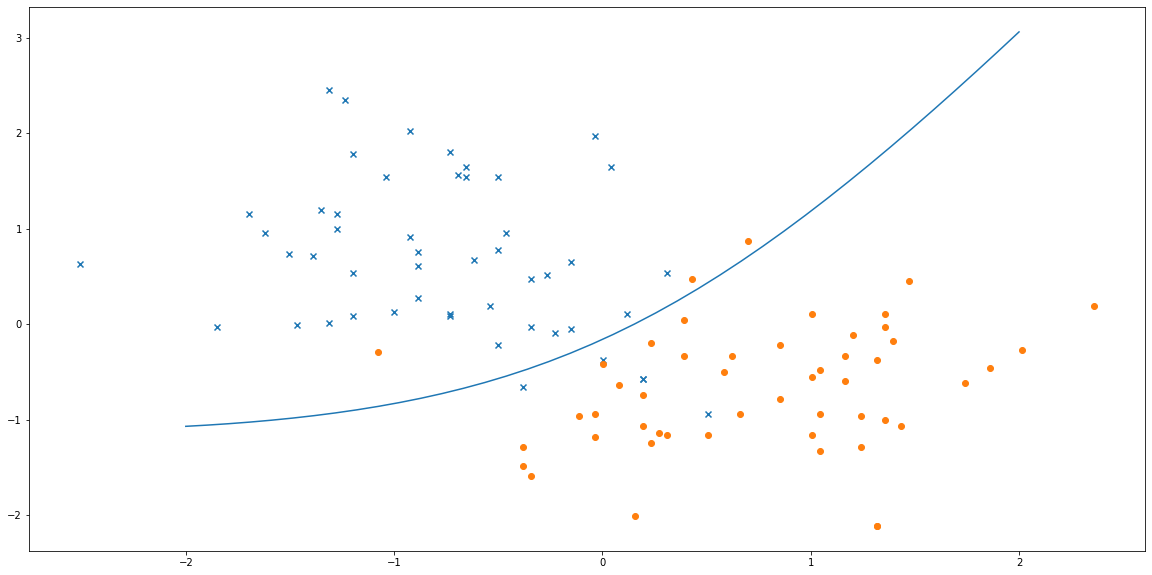

In [121]:
plt.figure(figsize=(20, 10))
plt.plot(x, y1)

plt.scatter(X_train[:, 0:1][Y_train==classes[0]], X_train[:, 1:2][Y_train==classes[0]], marker='x')
plt.scatter(X_train[:, 0:1][Y_train==classes[1]], X_train[:, 1:2][Y_train==classes[1]])

## f. Analyzing the boundary

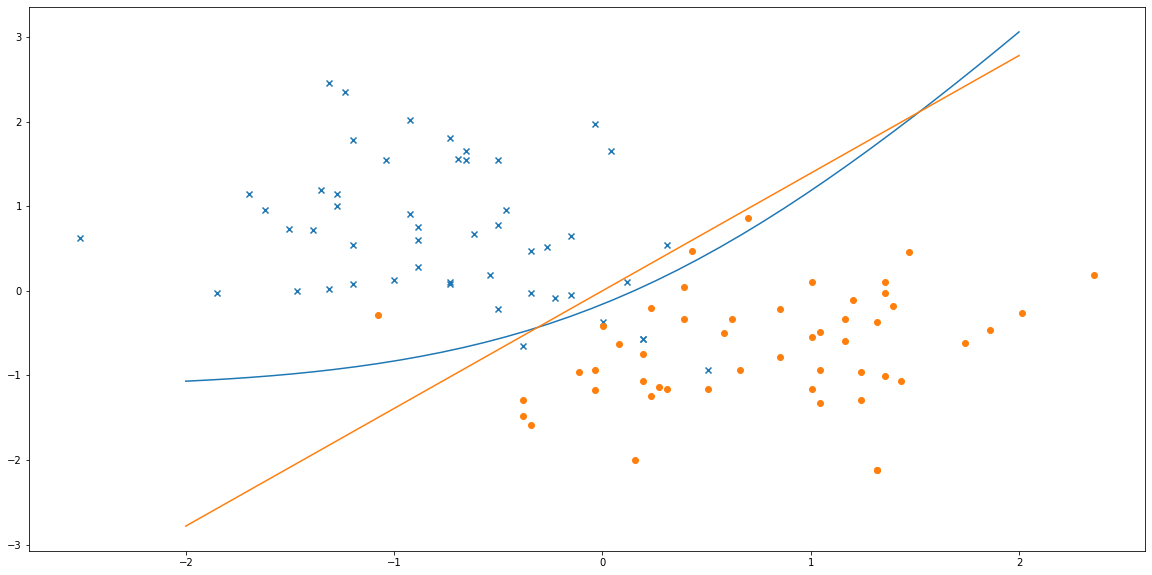

In [123]:
plt.figure(figsize=(20, 10))
plt.plot(x, y1)
plt.plot(x, y)
plt.scatter(X_train[:, 0:1][Y_train==classes[0]], X_train[:, 1:2][Y_train==classes[0]], marker='x')
plt.scatter(X_train[:, 0:1][Y_train==classes[1]], X_train[:, 1:2][Y_train==classes[1]])

It can be observed that the quadratic boundary is curving towards the `Alaska` class. 

It can be seen in the image that the quadratic seperator is overfitting the data. The two classes seem to be linearly seperable and linear separator is doing a good job whereas the quadratic seperator is curving a lot towards class `Alaska`.